In [2]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import random

In [3]:
# Import tables
eruptions = pd.read_csv("eruptions_galapagos.csv")
average_galapagos = pd.read_csv("average_galapagos.csv")

In [5]:
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

In [72]:
def accuracies(rolling_numbers, percents):
        rolling_galapagos = average_galapagos.copy()
        rain_start = '11-01'
        rain_end = '10-31'
        erupt_dates = eruptions['Start'][eruptions['Start'] >= '2004-11-01']
        predictions = []
        
        for i in rolling_numbers:
                
                rolling_galapagos['roll' + str(i)] = average_galapagos.Precipitation.rolling(i).mean()
                rolling_galapagos = rolling_galapagos.dropna()
                
                for j in percents:
                        
                        season_length = int((j * 365) / 100)
                        rainy_dates = pd.DataFrame()
                        
                        for k in range(18):
                                year = 2004 + k
                                yearly_rain = rolling_galapagos[(rolling_galapagos['Date'] >= str(year) + '-' + rain_start) & (rolling_galapagos['Date'] <= str(year + 1) + '-' + rain_end)].sort_values(by=['roll' + str(i)])
                                rainy_dates = rainy_dates.append(yearly_rain[-(season_length+1):-1])

                        rain_erup_freq = 0
                        for l in erupt_dates:
                                if l in np.array(rainy_dates['Date']):
                                        rain_erup_freq += 1

                        predictions.append([i, j, rain_erup_freq / len(erupt_dates)])

        return predictions


In [73]:
# # Creates the blank csv file

# csv_file_name = 'eruption_accuracies.csv'
# #Fix this so that it doesnt overwrite the header

# column_names = ['Rolling sums (days)', 'Rainy season (fraction of year)', 'Fraction of eruptions in rainy season', 'Prediction improvement']

# # Open the CSV file in write mode ('w', 'wb', or 'w+', depending on your Python version).
# with open(csv_file_name, mode='w', newline='') as csv_file:
#     # Create a DictWriter object with the column names.
#     csv_writer = csv.DictWriter(csv_file, fieldnames=column_names)

#     # Write the header (column names) to the CSV file.
#     csv_writer.writeheader()

In [7]:
# # Fills the blank csv file

# # Choose rolling number and length of rainy season
# rolling_numbers = [30, 60, 90, 120]
# percents = [5, 10, 15, 20, 25, 30]

# predictions = accuracies(rolling_numbers, percents)

# for i in predictions:
#     with open('eruption_accuracies.csv', mode='a', newline='') as main:
#         csv_writer = csv.writer(main)
#         csv_writer.writerow([i[0], i[1]/100, round(i[2],2), round(100*((100*i[2])-i[1])/i[1],2)])



# # x = [i[0] for i in predictions]
# # y = [i[1] for i in predictions]

# # fig = plt.figure(figsize=(8,6))
# # ax = fig.add_subplot(111)

# # plt.scatter(x, y, c='green', s=300)

# # plt.show()

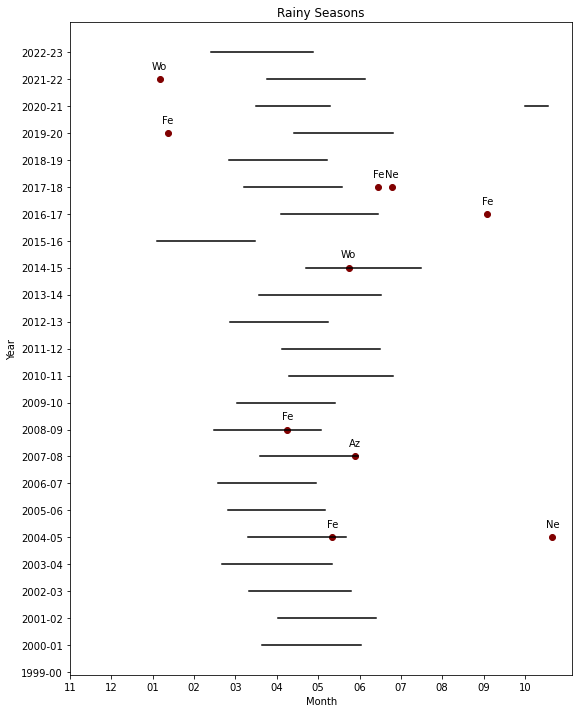

In [24]:
# Generates the rainy season plot

rolling_galapagos = average_galapagos.copy()
rain_start = '11-01'
rain_end = '10-31'
rolling_galapagos['roll90'] = average_galapagos.Precipitation.rolling(90).mean()
rolling_galapagos = rolling_galapagos.dropna()

plt.figure(figsize=(9,12))

erupt_dates = eruptions['Start'][eruptions['Start'] >= '2004-11-01']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
y = [(i + (2/12)) // 1 for i in decimal_erupts]
labels = list(eruptions['Volcano'][eruptions['Start'] >= '2004-11-01'])
plt.scatter(x, y, color='maroon')
for i in range(len(x)):
    plt.annotate(labels[i][0:2], (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')


for k in range(24):
        year = 2000 + k
        yearly_rain = rolling_galapagos[(rolling_galapagos['Date'] >= str(year) + '-' + rain_start) & (rolling_galapagos['Date'] <= str(year + 1) + '-' + rain_end)].sort_values(by=['roll90'])
        rainy_season = yearly_rain[-73:-1].sort_values(by=['Date'])
        if k == 20:
                x = np.array((rainy_season['Date'][rainy_season['Date'] < '2021-10-01'].apply(date_to_decimal_year) + (2/12)) % 1)
                y = np.array((rainy_season['Date'][rainy_season['Date'] < '2021-10-01'].apply(date_to_decimal_year) + (2/12)) // 1)
                plt.plot(x, y, color='black')

                x = np.array((rainy_season['Date'][rainy_season['Date'] > '2021-10-01'].apply(date_to_decimal_year) + (2/12)) % 1)
                y = np.array((rainy_season['Date'][rainy_season['Date'] > '2021-10-01'].apply(date_to_decimal_year) + (2/12)) // 1)
                plt.plot(x, y, color='black')
                
        else:
                x = np.array((rainy_season['Date'].apply(date_to_decimal_year) + (2/12)) % 1)
                y = np.array((rainy_season['Date'].apply(date_to_decimal_year) + (2/12)) // 1)
                plt.plot(x, y, color='black')

plt.yticks([2000+k for k in range(24)], [str(1999+k) + '-' + str(2000+k)[2:4] for k in range(24)])
plt.xticks([(1/12)*k for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.xlabel("Month") 
plt.ylabel("Year") 
plt.title('Rainy Seasons') 
plt.show() 